## EXTRACCION DE DATOS


In [87]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

In [88]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df_clientes = pd.DataFrame(requests.get(url).json())

In [123]:
df_clientes.head()

,ID_Cliente,Churn,customer,Telefono,Servicios_Internet,Cuenta,MonthlyCharges,Cuentas_Diarias,Churn_bin,Genero
0,0002-ORFBO,no,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'internetservice':_'dsl',_'onlinesecurity':_'...","{'Contract': 'One year', 'PaperlessBilling': '...",65.6,2.186667,0.0,Female
1,0003-MKNFE,no,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'internetservice':_'dsl',_'onlinesecurity':_'...","{'Contract': 'Month-to-month', 'PaperlessBilli...",59.9,1.996667,0.0,Male
2,0004-TLHLJ,yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'internetservice':_'fiber_optic',_'onlinesecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",73.9,2.463333,1.0,Male
3,0011-IGKFF,yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'internetservice':_'fiber_optic',_'onlinesecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",98.0,3.266667,1.0,Male
4,0013-EXCHZ,yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'internetservice':_'fiber_optic',_'onlinesecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",83.9,2.796667,1.0,Female


## CONOCE EL CONJUNTO DE DATOS


In [90]:
# explorar columnas
df_clientes.info()
df_clientes.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


### ANALISIS DE ESTRUCTURA DEL DATASET

- El dataset contiene 7267 registros y 6 columnas.
- Todas las columnas son de tipo `object`, lo que indica que pueden ser catego\ricas o texto.
- La columna `Churn` parece ser la variable objetivo (indica si el cliente se dio de baja).
- `customerID` es un identificador único.
- Las columnas `customer`, `phone`, `internet` y `account` contienen información del perfil y servicios del cliente.
- No hay valores nulos facilitando el analisis.


## COMPROBACIÓN DE INCOHERENCIAS EN LOS DATOS

In [91]:
# 1. Valores ausentes
print("Valores nulos por columna:\n", df_clientes.isnull().sum())

Valores nulos por columna:
 customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


In [92]:
# 2. Duplicados
print("\nNúmero de filas duplicadas:", df_clientes.astype(str).duplicated().sum())


Número de filas duplicadas: 0


In [93]:
# 3. Errores de formato
print("\nEjemplo de IDs Unicos:", df_clientes['customerID'].unique()[:5])


Ejemplo de IDs Unicos: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ']


In [94]:
# 4. Inconsistencias en categorías
print("\nValores únicos en Churn:", df_clientes['Churn'].unique())


Valores únicos en Churn: ['No' 'Yes' '']


### Verificación de calidad de datos

- No se detectan valores nulos ni duplicados.
- Los IDs parecen estar correctamente formateados.
- La columna `Churn` presenta una categoria vacia (`''`), lo cual podría requerir limpieza en etapas posteriores.

## MANEJO DE INCONSISTENCIAS

In [95]:
# 1. Normalizar categorías, pasar todo a minúsculas y quitar espacios
df_clientes['Churn'] = df_clientes['Churn'].str.lower().str.strip()

In [96]:
# 2. Reemplazar valores vacíos en Churn por NaN
df_clientes['Churn'] = df_clientes['Churn'].replace('', np.nan)

In [97]:
# 3. limpieza en otras columnas (quitar espacios, normalizar texto)
df_clientes['phone'] = df_clientes['phone'].astype(str).str.strip()
df_clientes['internet'] = df_clientes['internet'].astype(str).str.lower().str.replace(' ', '_')

In [98]:
# 4. Verificar nuevamente valores únicos
print("Valores únicos en Churn:", df_clientes['Churn'].unique())

Valores únicos en Churn: ['no' 'yes' nan]


## COLUMNA DE CUENTAS DIARIAS (OPCIONAL)

In [100]:
# Extraer el valor de MonthlyCharges desde account['Charges']['Monthly']
df_clientes['MonthlyCharges'] = df_clientes['account'].apply( lambda x: float(x['Charges']['Monthly']) if isinstance(x, dict) and 'Charges' in x and 'Monthly' in x['Charges'] else np.nan )

In [101]:
# Crear la columna Cuentas_Diarias
df_clientes['Cuentas_Diarias'] = df_clientes['MonthlyCharges'] / 30


In [102]:
# Verificar resultado
df_clientes[['MonthlyCharges', 'Cuentas_Diarias']].head()


,MonthlyCharges,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [103]:
df_clientes['account'].iloc[0]


{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

### Creación de la columna Cuentas_Diarias

Se extrajo el valor de facturación mensual desde la columna `account` y se dividió por 30 para obtener una estimación diaria. Esta nueva variable permite analizar el comportamiento financiero del cliente.


## ESTANDARIZACIÓN Y TRANSFORMACIÓN DE DATOS (OPCIONAL)

In [104]:
# Convertir valores de 'Churn' a binario
df_clientes['Churn_bin'] = df_clientes['Churn'].map({'yes': 1, 'no': 0})

In [105]:
# Renombrar columnas para mayor claridad (ejemplo)
df_clientes.rename(columns={ 'customerID': 'ID_Cliente',
                            'phone': 'Telefono',
                             'internet': 'Servicios_Internet',
                             'account': 'Cuenta'
                              }, inplace=True)

In [106]:
# Verificar resultado
df_clientes[['ID_Cliente', 'Churn', 'Churn_bin']].head()

,ID_Cliente,Churn,Churn_bin
0,0002-ORFBO,no,0.0
1,0003-MKNFE,no,0.0
2,0004-TLHLJ,yes,1.0
3,0011-IGKFF,yes,1.0
4,0013-EXCHZ,yes,1.0


### Estandarización y transformación de datos

Se aplicaron transformaciones para mejorar la consistencia y claridad del dataset:
- Se creó una columna binaria `Churn_bin` para facilitar el análisis matemático.
- Se renombraron columnas clave para hacerlas más comprensibles.
Estas acciones permiten una interpretación más directa de los resultados y facilitan la comunicación con públicos no técnicos.


## ANALISIS DESCRIPTIVO


In [107]:
# Estadísticas descriptivas de todas las columnas numéricas
df_clientes.describe()

,MonthlyCharges,Cuentas_Diarias,Churn_bin
count,7267.000000,7267.000000,7043.000000
mean,64.720098,2.157337,0.265370
std,30.129572,1.004319,0.441561
min,18.250000,0.608333,0.000000
25%,35.425000,1.180833,0.000000
50%,70.300000,2.343333,0.000000
75%,89.875000,2.995833,1.000000
max,118.750000,3.958333,1.000000


In [160]:
# incluir también categóricas
df_clientes.describe(include='all')

,ID_Cliente,Churn,customer,Telefono,Servicios_Internet,Cuenta,MonthlyCharges,Cuentas_Diarias,Churn_bin,Genero,Contract,PaymentMethod,Tenure,TotalCharges,Charges
count,7267,7267,7267,7267,7267,7267,7267.000000,7267.000000,7043.000000,7267,7267,7267,0.0,0,0.0
unique,7267,3,891,3,129,6931,NaN,NaN,NaN,2,3,4,NaN,0,NaN
top,9995-HOTOH,no,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'internetservice':_'no',_'onlinesecurity':_'n...","{'Contract': 'Month-to-month', 'PaperlessBilli...",NaN,NaN,NaN,Male,Month-to-month,Electronic check,NaN,NaN,NaN
freq,1,5174,223,3495,1581,6,NaN,NaN,NaN,3675,4005,2445,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,2.157337,0.265370,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,1.004319,0.441561,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.608333,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,1.180833,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,2.343333,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,2.995833,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
# Ejemplo de métricas específicas en la columna de facturación mensual
print("Media:", df_clientes['MonthlyCharges'].mean())
print("Mediana:", df_clientes['MonthlyCharges'].median())
print("Desviación estándar:", df_clientes['MonthlyCharges'].std())

Media: 64.72009770194028
Mediana: 70.3
Desviación estándar: 30.12957188566699


## DISTRIBUCIÓN DE EVASIÓN

In [128]:
# Contar valores de churn
churn_counts = df_clientes['Churn'].value_counts()

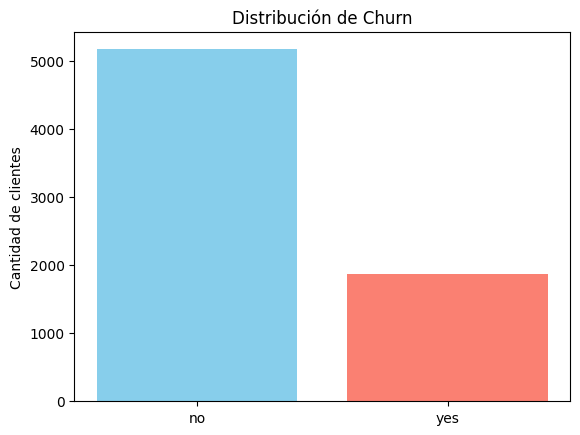

In [111]:
# Gráfico de barras
plt.bar(churn_counts.index, churn_counts.values, color=['skyblue','salmon'])
plt.title('Distribución de Churn')
plt.ylabel('Cantidad de clientes')
plt.show()

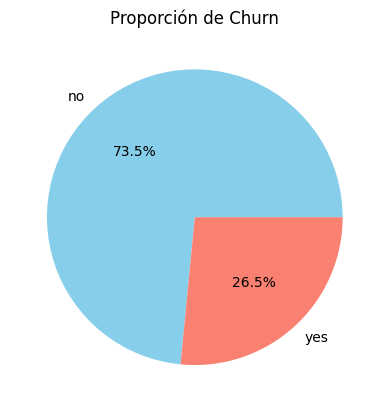

In [112]:
# Gráfico circular
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', colors=['skyblue','salmon'])
plt.title('Proporción de Churn')
plt.show()


## RECUENTO DE EVASIÓN POR VARIABLES CATEGÓRICAS

In [114]:
# Extraer el género desde el diccionario en la columna 'customer'
df_clientes['Genero'] = df_clientes['customer'].apply(
    lambda x: x.get('gender') if isinstance(x, dict) else np.nan
)


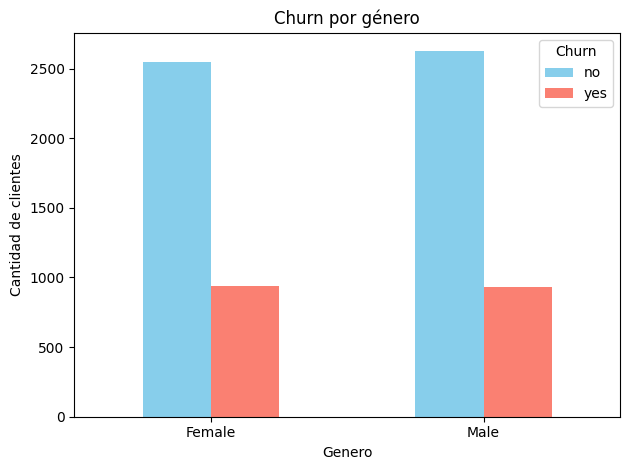

In [117]:
# Tabla cruzada
churn_por_genero = df_clientes.groupby(['Genero', 'Churn']).size().unstack()

# Gráfico de barras agrupadas
churn_por_genero.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])
plt.title('Churn por género')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


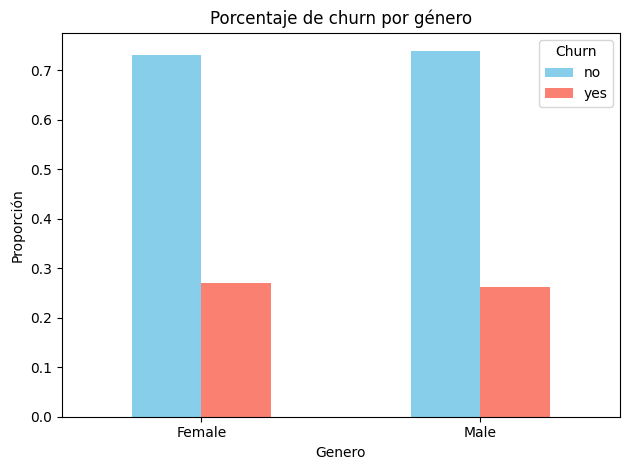

In [126]:
# Calcular proporciones
churn_pct = df_clientes.groupby('Genero')['Churn'].value_counts(normalize=True).unstack()

# Gráfico de barras
churn_pct.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Porcentaje de churn por género')
plt.ylabel('Proporción')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


In [130]:
# Extraer tipo de contrato
df_clientes['Contract'] = df_clientes['Cuenta'].apply(
    lambda x: x.get('Contract') if isinstance(x, dict) else np.nan
)

# Extraer método de pago
df_clientes['PaymentMethod'] = df_clientes['Cuenta'].apply(
    lambda x: x.get('PaymentMethod') if isinstance(x, dict) else np.nan
)


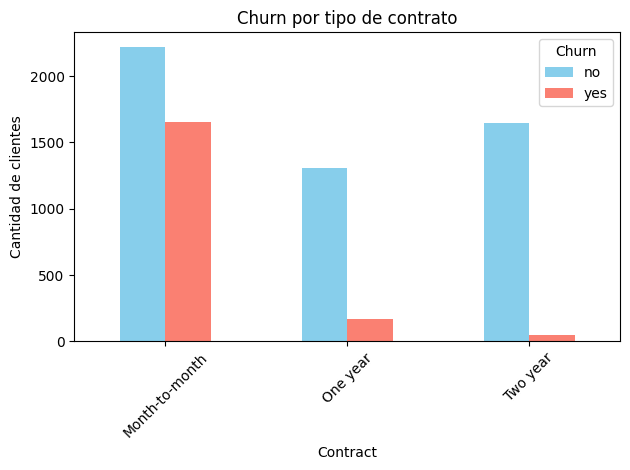

In [135]:
# tipo contrato
churn_por_contrato = df_clientes.groupby(['Contract', 'Churn']).size().unstack()
churn_por_contrato.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])
plt.title('Churn por tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


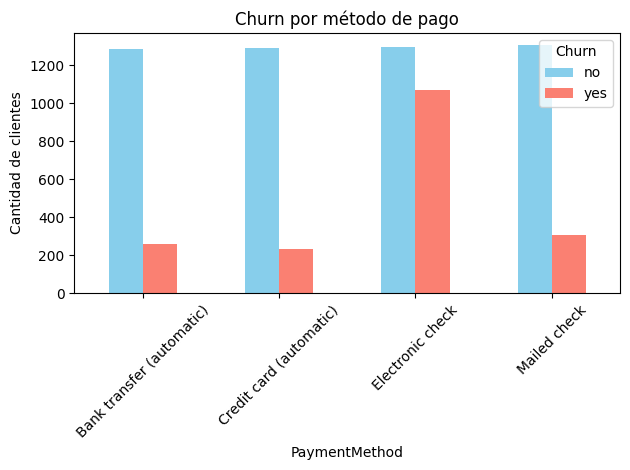

In [134]:
# tipo pago
churn_por_pago = df_clientes.groupby(['PaymentMethod', 'Churn']).size().unstack()
churn_por_pago.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])
plt.title('Churn por método de pago')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


## CONTEO DE EVASIÓN POR VARIABLES NUMÉRICAS

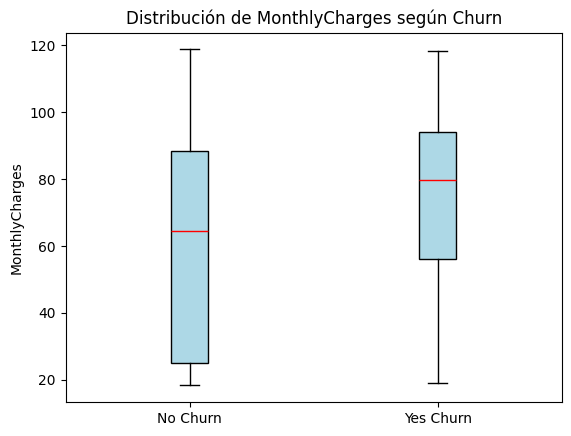

In [157]:
# Filtrar valores válidos
no_churn_monthly = df_clientes[df_clientes['Churn'] == 'no']['MonthlyCharges'].dropna()
yes_churn_monthly = df_clientes[df_clientes['Churn'] == 'yes']['MonthlyCharges'].dropna()

# Graficar
plt.boxplot([no_churn_monthly.values, yes_churn_monthly.values],
            tick_labels=['No Churn', 'Yes Churn'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red'))
plt.title('Distribución de MonthlyCharges según Churn')
plt.ylabel('MonthlyCharges')
plt.show()


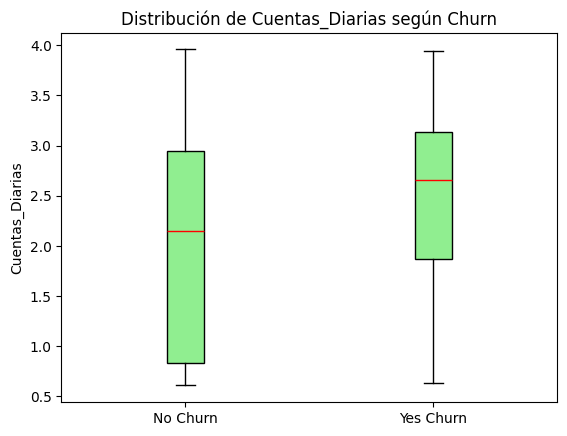

In [158]:
# Filtrar valores válidos
no_churn_diario = df_clientes[df_clientes['Churn'] == 'no']['Cuentas_Diarias'].dropna()
yes_churn_diario = df_clientes[df_clientes['Churn'] == 'yes']['Cuentas_Diarias'].dropna()

# Graficar
plt.boxplot([no_churn_diario.values, yes_churn_diario.values],
            tick_labels=['No Churn', 'Yes Churn'],
            patch_artist=True,
            boxprops=dict(facecolor='lightgreen'),
            medianprops=dict(color='red'))
plt.title('Distribución de Cuentas_Diarias según Churn')
plt.ylabel('Cuentas_Diarias')
plt.show()


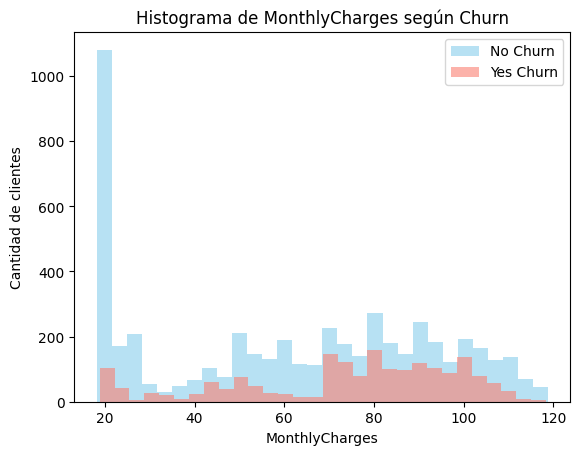

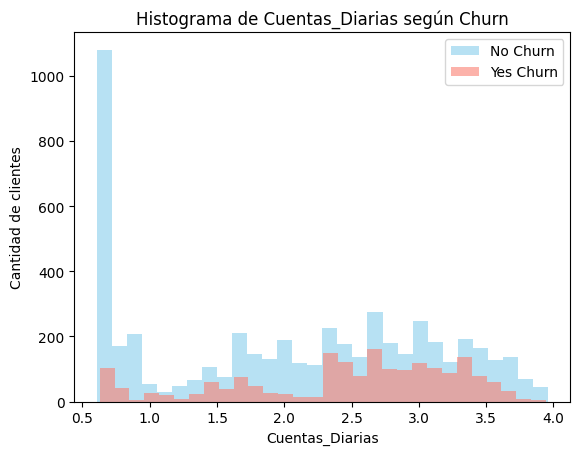

In [159]:
# MonthlyCharges
plt.hist(no_churn_monthly, bins=30, alpha=0.6, color='skyblue', label='No Churn')
plt.hist(yes_churn_monthly, bins=30, alpha=0.6, color='salmon', label='Yes Churn')
plt.title('Histograma de MonthlyCharges según Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Cantidad de clientes')
plt.legend()
plt.show()

# Cuentas_Diarias
plt.hist(no_churn_diario, bins=30, alpha=0.6, color='skyblue', label='No Churn')
plt.hist(yes_churn_diario, bins=30, alpha=0.6, color='salmon', label='Yes Churn')
plt.title('Histograma de Cuentas_Diarias según Churn')
plt.xlabel('Cuentas_Diarias')
plt.ylabel('Cantidad de clientes')
plt.legend()
plt.show()


# Informe Final del Análisis de Evasión de Clientes

## 🔹 Introducción
El objetivo de este análisis es comprender el fenómeno de **evasión de clientes (Churn)** en la empresa. La pérdida de clientes afecta directamente los ingresos y la estabilidad del negocio, por lo que identificar patrones asociados a la evasión permite diseñar estrategias de retención más efectivas.

## 🔹 Limpieza y Tratamiento de Datos
Se realizó un proceso de preparación que incluyó:
- Normalización de la variable **Churn** para asegurar consistencia en los valores ("yes"/"no").
- Verificación de tipos de datos en las variables numéricas (`MonthlyCharges`, `Cuentas_Diarias`), confirmando que no contienen valores nulos.
- Inspección de la columna **Cuenta**, identificando las claves disponibles (`Contract`, `PaymentMethod`, `PaperlessBilling`, `Charges`) y descartando aquellas sin datos útiles.
- Confirmación de la cantidad de clientes en cada grupo: aproximadamente **5174 sin evasión** y **1869 con evasión**.

## 🔹 Análisis Exploratorio de Datos
Se exploraron las variables numéricas más relevantes:

- **Distribución de MonthlyCharges según Churn**:  
  Los clientes que cancelaron presentan valores más altos de gasto mensual, con mayor dispersión en la distribución.

- **Distribución de Cuentas_Diarias según Churn**:  
  Se observa un patrón similar: los clientes que cancelan tienen mayor gasto diario promedio y una variabilidad más amplia.

- **Histogramas comparativos**:  
  Los clientes que no cancelan se concentran en rangos bajos de gasto, mientras que la evasión se distribuye de manera más uniforme en rangos altos.

## 🔹 Conclusiones e Insights
- Existe una **relación directa entre mayor gasto y mayor probabilidad de evasión**.  
- Los clientes con cargos más altos muestran mayor dispersión en su comportamiento, lo que indica sensibilidad al precio y heterogeneidad en la percepción de valor.  
- La ausencia de variables como `Tenure` y `TotalCharges` limita el análisis temporal, pero las métricas disponibles permiten identificar segmentos de riesgo.  
- Los clientes con **MonthlyCharges altos** son los más propensos a cancelar, lo que sugiere que el precio es un factor crítico.

## 🔹 Recomendaciones
- **Estrategias de retención en segmentos de alto gasto**: ofrecer beneficios adicionales, descuentos iniciales o paquetes de valor para clientes con cargos elevados.  
- **Alertas tempranas**: implementar un sistema de monitoreo que identifique clientes en los deciles superiores de gasto mensual y diario.  
- **Campañas personalizadas**: diseñar mensajes de fidelización y programas de lealtad para reducir la percepción de costo elevado.  
- **Mejora de datos**: incorporar variables de tiempo de contrato (`Tenure`) y gasto acumulado (`TotalCharges`) para enriquecer futuros modelos predictivos.  
- **Monitoreo continuo**: mantener dashboards con métricas de churn por rango de gasto y realizar análisis de cohortes para evaluar la efectividad de las acciones.

---

 Este informe resume el proceso completo: desde la limpieza de datos hasta la obtención de insights estratégicos, aportando una base sólida para la toma de decisiones orientadas a reducir la evasión de clientes.


## EXTRA

                 MonthlyCharges  Cuentas_Diarias  Churn_bin
MonthlyCharges         1.000000         1.000000   0.189866
Cuentas_Diarias        1.000000         1.000000   0.189866
Churn_bin              0.189866         0.189866   1.000000


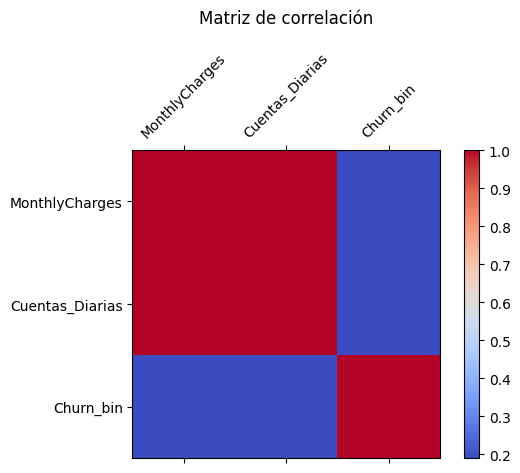

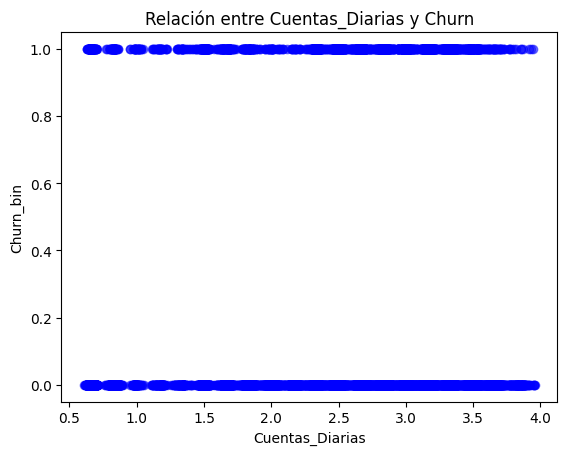

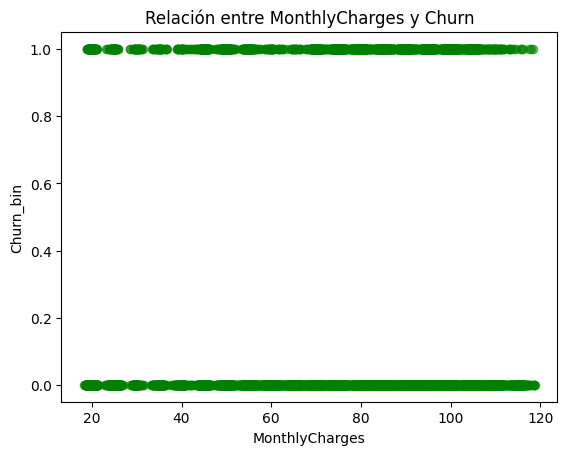

In [161]:


# Crear variable binaria de churn (0 = no, 1 = sí)
df_clientes['Churn_bin'] = df_clientes['Churn'].apply(lambda x: 1 if x == 'yes' else 0)

# Calcular matriz de correlación
corr_matrix = df_clientes[['MonthlyCharges','Cuentas_Diarias','Churn_bin']].corr()
print(corr_matrix)

# Visualizar matriz de correlación con Matplotlib
fig, ax = plt.subplots(figsize=(6,4))
cax = ax.matshow(corr_matrix, cmap='coolwarm')
plt.colorbar(cax)

# Etiquetas
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45)
ax.set_yticklabels(corr_matrix.columns)

plt.title('Matriz de correlación', pad=20)
plt.show()

# Gráfico de dispersión: Cuentas_Diarias vs Churn_bin
plt.scatter(df_clientes['Cuentas_Diarias'], df_clientes['Churn_bin'], alpha=0.5, color='blue')
plt.title('Relación entre Cuentas_Diarias y Churn')
plt.xlabel('Cuentas_Diarias')
plt.ylabel('Churn_bin')
plt.show()

# Gráfico de dispersión: MonthlyCharges vs Churn_bin
plt.scatter(df_clientes['MonthlyCharges'], df_clientes['Churn_bin'], alpha=0.5, color='green')
plt.title('Relación entre MonthlyCharges y Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Churn_bin')
plt.show()
